In [1]:
import sys
sys.path.append("../src/")
from auv_gym_env import Environment
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# instantiate environment
world_size = 50
gravity = -1
xinit, yinit = 10, 10
targetx, targety = 0, 0
env = Environment(world_size, gravity, xinit, yinit, targetx, targety)
env.render()
rewards = list()

In [3]:
# control AUV with constant thrust angle and power
nframes = 10000
for frame in range(nframes):
    obs, reward, done, info = env.step((
        np.random.uniform(*env.auv._thruster_angle_limits), 
        np.random.uniform(0, 10)
    ))
    env.render()
    print(reward)
    rewards.append(reward)

-79.91377757263909
-54.650536519318216
-17.07046914883212
-3.0919084832694916
-43.973178120420435
-55.22905604136609
-32.08411977997641
-38.084245773337194
-80.00067424880478
0.21665852018355752
-0.5006297596726732
-45.73731841879678
-44.880497623429534
-81.71014926077406
-4.99753852573359
-1.6726207755857536
-37.430402246867295
-14.706674923528798
-99.3336106103552
-77.82871459417507
-65.74075700716023
-10.289624348561349
-21.743005780202644
-22.62055269613266
-18.86804064581301
0.12964464242821933
-92.38406613259299
-65.66792339463433
-0.14681637649144885
-23.38184102239361
-46.28198025655585
-5.818953924767904
0.4989950485137155
-65.41650214050534
-2.9980490906988413
-1.8699734004235098
-43.58600412840497
-0.18057418604787223
-82.38322865365338
-57.4038060854588
-90.80273877595268
-6.505527677601888
-90.69157164494004
-42.77854988279414
-4.0909510288257875
-1.5110100608249881
-43.89979265838475
-43.120441124061706
0.4843131755766878
0.2665541273312827
-26.321246568830357
-10.9126492

0.4761168050630171
-15.969455710123851
-57.318914616247454
-57.44889846378688
-15.184088337418867
-4.1689365332615065
-49.37274259891531
-23.073037463595888
-78.5892755805002
-94.22654342020427
-18.483050657277296
-0.6445013604224374
-93.26302242591464
-19.111058115310527
-68.92180383414828
-25.715307988882998
-74.71399832345735
-46.55031562659544
-66.87786306263173
-40.488975303504965
-0.8476426019745833
-35.01347340556439
-7.9799283434164945
-22.638604161516064
-18.246303193872073
-14.08363402861217
-65.43375663047458
-7.295861544893844
-41.28318666191905
-90.83716581015831
-87.03491446782078
-81.01056090993487
-18.833922298185392
-12.939109617113472
0.41600145743185507
-58.818880192072854
-57.602690902177706
-5.8044080946440095
-0.6991354428416747
-40.8425794464505
-0.7591630103852616
-65.30318631110558
-9.609528145343978
-3.506841121497094
-2.0499417958951565
-24.966630303658132
-35.87045305770603
-91.24854023839526
-37.19315194250957
-5.024801128005548
-0.6111039958573674
-9.90972

-52.318627462857364
-67.0872422434325
-38.183566727506204
-24.02416264217861
-55.94705710909264
-55.80523246516507
-50.08466082481163
0.09773563347984893
-64.45089520411555
-65.03671478614369
1.007218795212732
-0.7256377613634324
-30.785246028479335
-2.5805134977030755
-47.32767520298948
-68.14316169840411
-7.373106133245805
-39.90244718221211
-62.066315849712616
-16.647680330235676
-19.081032730568005
-57.400517356910434
-41.97946065976032
-4.153371634561778
-8.089731692887982
-32.377720933878145
-18.46088402237476
-11.395733442877313
-17.582054936364965
-73.97039692958201
-66.38429787648569
0.32354091686587794
-15.169630036504707
-49.28950730430985
-0.3514133416952514
-16.40177971001216
-10.735608306065041
-57.26022196280834
-31.820826211624357
1.044168356651297
-66.89100672506369
-47.426071578822096
-35.72084942066408
0.9030923943679757
-63.46132053056483
-1.2668376327323592
-74.05873428886166
-93.89830315416889
-26.681285549405942
-43.40878073148839
-73.71166119103908
-3.4197544697

-28.730784075776118
-10.15768626283296
-38.752923585212685
-18.87420165550976
-5.555581503071063
-3.3518766949601764
-36.67261202285992
-88.21861924635408
-96.81803472618107
1.0008628767479426
-5.113662408026919
-1.9301847093055267
-1.077565998848383
-76.82285671837747
-50.83300153743166
-10.737648664563913
-2.493652754700621
-96.29135565835314
1.200382158306646
-13.149346919043165
-83.86282068816705
-78.64663053375858
0.3702729789935274
-93.97193258719557
-35.01714828572064
-41.05023531812841
-6.161088907750873
-87.53824667527986
-47.36691166741564
-0.0981031705212112
-71.47030207854411
-56.241083334583315
-9.551270224826116
-38.36799925614606
-11.037895408159489
1.2801317960124274
-4.8340477708312095
-87.09308037637358
0.6988846072537475
-32.795772523874625
-31.659110639275166
-51.200886336828965
-80.77338405187773
-79.11797472522632
-52.80657201370923
-13.663824608841685
-41.771759689992024
-15.74900443654555
-46.194863915837104
-33.508240218540735
-17.74277375163602
-76.00144528877

-16.073505671393264
-1.5801456276949153
-44.21670074035007
-62.619593488883496
-68.05165953807868
-18.11220066102923
-79.54204160728546
-2.2312837917516037
-44.30551693347151
-21.895718960123116
-60.953636378217986
-42.757745012474366
-83.30168252921698
-8.090368697419075
-19.561818202505385
-50.980486394606814
-22.556409135039267
-72.20493832298446
-17.40991896651937
-1.4263428993794631
-75.4566934317808
-13.578455483366382
-91.08656043550226
-39.87366725445516
-5.9418800321949305
0.14226944026589228
-0.8633605097540817
-18.7346798357662
-33.79118525342895
0.40098315697584086
-32.80546122628996
-3.531812800424951
-0.8972052751492278
-45.01998077066885
-63.50915818534404
-26.052760699781675
-59.72993694252085
-3.316936180627583
-63.5186506440684
0.33419667517998813
-8.248391935738812
0.5048483317966924
-1.918390441149084
-1.9988691905995442
-43.1113429140313
-10.130870172646055
-43.567924948394044
-75.0959128660692
-29.04102446239347
0.10053979876477598
-30.944945657635
-47.51768775949

-95.42506273366587
-29.14706688222808
0.714999656831803
-85.04014160037556
-21.470971942314364
-40.912744510669775
-13.55343637155566
-57.82615653820474
-75.70165018065588
-20.77865869163293
-79.71253374868662
-65.1489838629113
-34.36233188012931
0.39987037771472556
-73.51200605242022
-0.4068185929165148
-61.668874598552925
-19.494879546902904
-30.471594419448014
0.5643082788440066
-39.76374855535524
-2.6218394971056735
-30.077654405973735
-26.675270884425487
-5.412691953783589
-7.411520452004818
-10.692653717100717
-27.416044586686198
-40.359094801593656
-13.170059411889827
-97.83744453692708
-97.14522679999587
-49.791729330365605
-42.85585960077256
-7.554705059848176
-67.63623132089069
-57.27213855236401
-97.06086094711732
0.7887331533537262
-92.59905300862901
-28.82366273622469
-0.2787011814323662
0.7032790505437113
-17.99917130461759
-0.8733202644092187
-2.9482986693987443
-64.68624782562875
-86.14275210723008
0.0632011245123113
-63.10935339573923
-24.86002063402804
-39.47433980715

0.4215032000824788
-75.29779062245925
-39.40506551877254
-9.171005391583028
-11.228352534309685
0.08509142813839432
-88.6656924703038
-15.0507516167164
-45.26985224304621
-36.83988145610487
-37.04321676848541
-15.410306848625783
-40.214722073685046
0.2890484188765656
-28.445456041044302
-27.153696275295644
-48.54525085294703
-12.644746680829495
-71.43130042962206
-21.304404839086526
0.7709461000461035
-12.886561503794601
-7.2528036781567815
-25.197746986253527
-76.29487256232214
-83.81854799273181
-85.0284213636648
-59.09172239836267
-13.450165260192701
-53.538294308560765
-20.98908990812265
0.3157226568286353
-5.631136879820461
-95.41299829075226
-18.55588804851286
-48.83624775968619
-5.440704212512132
-37.97984104879958
-41.42064768243902
-9.88158468925318
-97.25881100839175
-41.70811987393084
-10.224882304104923
-62.62285770937438
-4.163168530927883
-43.06768983670044
-90.84299033817884
-63.19352304551717
-53.13448472476179
-59.19631575395879
-2.9244167338030778
-0.2818069245936726


-68.62458013479225
-39.32124806581778
-80.48693461290341
0.7452818174716328
-37.526511514779344
-76.61793470242448
-60.05141671650962
-5.18418987803483
-9.684428930387394
0.7434925265382962
-99.07482423596674
-0.6453362387572423
-2.1150780067658532
-3.3680119362587195
-28.701176541164237
0.2923073917022785
-46.37167396613227
-75.64261614453297
0.5164867569869396
-81.91986380342149
-16.043579800040828
-82.2455665672359
-24.88331917082843
-77.25082019544998
-37.16320921621613
0.5898731257833683
-3.2124035011145535
-34.77742741745155
-22.388628012935655
-23.5509088489908
-0.7731761035830365
-64.14612315677296
-12.327127552878126
-10.350843423962823
-23.003705496366752
-90.92719839373771
-71.49721306254375
-93.90658029068328
-2.4497058855973144
-18.278702627830906
-8.422607658498544
-57.759892177400694
-33.96933827561333
-44.581168196485386
-9.060088961944935
-34.1686604241839
-23.73811142273964
-30.259175129116656
-1.0688442995557752
-36.04867390138357
-17.58208686559742
-7.80658023902473

-39.610864093613685
-63.15678479990596
-17.50124753088931
-20.656252528488807
-1.3094961005807724
-43.20955083129461
-3.5456330384694033
-36.87023691002956
0.25462499958423246
-15.53926675124883
-2.723628061399128
-47.62029433627378
-57.3508202281407
-4.318992297808518
-75.02557596593452
-4.276852056609837
-35.2579507876999
-10.792002283926639
-9.425552335667065
0.20117162938649658
-66.0913888101459
-23.58926658138828
-6.773507482911803
-75.42690409596504
0.6347543070512879
-3.731612637561657
0.13618677268767954
-49.48356662770885
-24.416894310804015
-3.1411011755245095
0.20142658077644693
-5.484318857429793
-31.093075229050182
-2.173702293232881
-78.91637914784471
0.26005880042614804
-9.084031675349463
-1.2206786241158554
-22.406645479771985
-58.06164172781163
-3.3605160032290335
-4.958474915181254
-1.1703530798089221
-64.0686709769952
-7.25363587327276
-55.5288866285191
-45.864725174611614
-85.35466909009983
-3.1750588121251058
-82.83572087620921
-34.12284847815611
-24.87002735873462

-76.42537933117902
-29.312005436845553
-92.6159655179094
-29.057069108971728
-86.89014165291395
-19.918867313343455
-92.89775775773866
-25.046258697126763
-51.36428324082911
-10.735688721553462
-68.5414240831418
-11.828942289664916
-1.5541580915334068
-55.27711531510589
-73.23727747111708
-13.450202071193539
-0.40620191507469017
-54.74459945254107
-47.03395112431128
-53.034369295606986
-56.95462355659245
-27.285446797787422
-21.673170220854367
-27.88710881861778
-7.033765860123587
-87.00824287849105
0.5181068263756842
-47.3126179874172
-43.87376295114967
-38.1318773463478
-23.27382913419774
-4.018428072034355
-80.69832956163573
-21.46984394424359
-18.332725298904005
-78.95872807220557
-59.50706083536134
-23.597178268766516
-11.013365987901237
-78.0249427730638
-68.68117935302462
-97.37209773054752
-3.1842734318559485
-41.725588487436255
-7.8599749234556535
-7.215443770396217
-83.70431148417181
-35.96654995639869
-37.429710953712686
0.2571913810512618
0.7639597084865313
-73.958041752708

-67.91165556828062
-17.026883679114388
-96.26666994698009
-29.53199987093295
-64.2005888076716
-34.65529525647771
-43.68767622069011
-47.22558405258564
-10.76691271540886
-25.133247527817815
-18.189728218158255
-24.291675793508563
-38.9461026323898
-59.58636656299317
-36.2423647350455
-26.33309181707536
-71.57082235137716
-15.71336735829675
-48.438434369650935
-79.08975169660997
-0.6579233860436013
-74.21356305421908
-26.49187860292199
-23.244561929499486
-18.412232920498536
0.2650277155062992
0.7142825609965682
-49.21902165097053
-74.55219255995482
-2.778125148298349
-74.34807554521807
-56.71134085975861
-0.5728402083114178
-89.34985772224792
-34.443960088485845
-28.110161785169485
-89.9161839570094
-8.627455699622162
-33.26459339945545
-30.404802206213965
-20.619981971528784
-68.9085068597891
-53.982450972520944
-92.51225111272319
-21.1725087085446
-51.88184196299
0.12028797967453142
-19.307250072645594
-10.45213589417859
-53.58426759573174
-59.17714927496774
-1.7336005323235215
-1.4

-33.51684680245246
-12.7582975207925
-69.27714218096648
-0.19552825810094854
-96.10212689520773
-69.9637480832674
0.06848460431459269
-24.613946294444812
-82.05118440493756
-2.8856656071821254
-10.346762894637243
-4.332539393778444
-61.79273169997004
-13.266495841831123
-18.602666755607675
-78.3858915131946
-11.522852277728488
-17.638889789473154
-88.90308019441554
-1.047544111848683
-3.7686223138044608
-86.98653513887328
-9.152710592308175
-7.509172783103402
-59.49253389331284
-10.14421347106608
-40.53144717121975
-98.57507590172818
-4.9262453380435
-38.51073296981138
-0.9396437195764382
-7.636039790398001
0.2845830277867099
-22.18507523365662
-6.424828741969129
0.4834870970623559
0.33069939560633066
-29.931614924732525
-26.757473340484328
-2.5153035603646283
-5.182546125268546
-27.69752428725174
-39.21027764710104
-37.22525517917348
0.23765549623960525
-36.7920728572084
-58.310799875859196
-62.37339381444556
0.6432162490906592
-7.075140730787913
-36.570867566227825
-1.582509989807806

-61.492574866623066
0.1024463552857674
-97.28632804513386
-2.1149543257908903
-38.752770357600646
-51.437864628333195
-0.6159352087103128
-67.81483235620067
-23.17601046512001
-24.199925130132083
-3.1536515984979006
-3.8079641125987678
-6.480155258163301
-68.43448078967751
-3.8063903465547044
-31.963600668001522
-63.027809782585074
-59.763720234864415
-22.114293280727544
-2.000310860595301
-9.690011135815153
-54.250482220177894
-20.19643673977272
-28.53188661963607
-80.5822166138046
-90.92778772409338
-0.28568080992920797
-0.7045219134568865
-21.67430545953495
0.42798827613082424
-6.781865237423415
-51.89194279665548
-88.69587442684467
0.4326320245635811
-66.62055426792382
-40.807546172103486
-64.97212506549045
-16.570983798813874
-24.185035057234042
-63.08459415295456
-9.629567954970339
-77.42047085086627
-89.86992464454815
-51.2834491223247
-13.206985535024197
0.45118973943304025
-60.71933550788869
-82.33499887393333
-99.28672671422221
-33.73409032572982
-43.25262616884286
-66.278277

-3.193194910936688
-62.095580310279615
-11.322552864995638
-53.62537326510077
-89.16604139514007
-63.99831764383328
-40.1257205778771
-8.68949992687597
-94.1860503314677
-0.4178610049605237
-24.339204976558662
-2.206058537216409
-86.74341487098901
-9.63739384250556
-0.9873381792345782
-64.86061375826567
-76.93079447056454
-9.471958541024335
0.13695335232126404
-13.4073842706593
-38.53145182707657
-1.5382949474955703
-2.5861907258862535
-13.299493547340191
-2.190719105638996
-21.334366282052553
-0.41151082085593005
-50.60374664163113
-11.009806269067827
-3.2832551310111002
-66.15013822423465
-74.37385496681115
-85.89496191299526
-22.987355121645084
-0.548899641241192
-32.371101180426834
-19.207157805796005
-35.26280445624567
-43.297515820037475
-31.59821823298515
-36.626429309867554
-31.04177255373007
-85.84265107257795
-1.9494391796640125
-87.33978709549743
-50.60021857638974
-75.41868616539288
-46.911133726545366
0.46486612200144506
-1.9431033738993277
0.096245378372454
-53.5212296773

-13.90457434436523
-32.49532745556265
-81.21658448393755
-17.613959237202312
-26.877417888717048
-17.81182675998567
-21.174317214113525
-4.607614648682201
0.3559789629501777
-0.6154493987160893
-36.289270041312705
-37.289517857424215
-43.49124394437779
-5.621671768022511
-80.80489131111726
0.47088753130409744
-68.36230783365176
-6.327409407441027
-44.88231561945123
-48.569375214369664
-91.99755386287606
0.701378951119901
-23.536523067884968
-90.32600162767515
-32.81803930242921
-48.408316164926845
-29.424983013013126
0.5389651829990845
-3.210560625292316
-18.473803407596318
-42.04329627216199
0.4616576641148235
-49.76844866831179
-15.642235729393445
-82.77806391248414
-5.605595364713136
-50.15903818275014
-92.01203206747378
-95.7258599015436
-73.04926549787037
0.20424678795363171
-77.51454751947131
0.5492957192216129
-32.4666568654396
0.5482003882677797
-96.5784752126312
-77.8282500175953
-11.751766940405421
-83.30059373537138
-6.022127755485519
-22.780625898551527
-21.04732800188861
-

-55.701943292264744
0.26906067824078383
-30.15182096164326
-92.99311004968251
-15.78930875388157
0.3357012297000193
-7.8911779657242755
0.5836884622188571
-60.02549026654825
-6.608642814604254
-56.214947601101066
-2.038705738339036
-72.38720749728199
-8.331131949686691
-37.8231700730234
-88.90232447227197
0.28328234756009774
-23.855843761665653
-15.220232033036707
-2.040671527124469
-15.17036593601677
-5.322148624578867
-67.32621314637471
-8.828508702622024
-47.96826036978648
-38.425387941588
-84.1685592725837
-36.60981002663751
-26.36553591634531
-81.49562612739822
-62.07848907309668
-44.007017540126434
-85.75348183986819
-0.13321963952334515
-49.28109516224265
-97.03118895720891
-3.365740192655978
0.6104843381187478
-93.6323939037391
-91.47764992174152
-33.737981915659994
-3.1362686511039093
-0.2857377890012861
-24.64975544500082
-19.861743462250338
-30.46513108221822
-89.3251418794222
-84.93654324884999
-60.925670057581726
-10.035012468592765
-52.94087751536648
-14.345805909396692
-

-26.443771189228173
-7.06134038780236
-26.082270964370394
-32.237405882030004
-9.866505749257398
-32.26336586950749
-53.20186347437092
-54.45662184107851
-71.94990583097999
-14.4295469673881
-17.766154216894662
-11.273292440162898
-76.97684296208567
0.6763380364497427
-15.715215896086683
-67.3818162402574
-0.16848620605586784
-58.68539740602594
-74.23285587498955
-27.52689855819374
-15.816911939116249
0.6450185235489948
-35.26072227848201
-9.045772087870443
-1.6200787145355733
-8.902007270039535
-44.18393523765769
-84.78984416948664
-92.24840418630434
-91.65315146693413
-69.42233375684428
-78.07580956452145
0.626582807895544
0.5665894355843794
0.2679410064030912
-26.514019374424887
-0.4245312786645271
0.2279344656208867
-0.5686208614186588
-29.81822978288759
-8.084505582728486
-39.209068353052615
-79.13668476672653
0.417655624093129
-13.823892825429425
-0.08671475145018892
-4.708454578207055
-31.28701399789106
0.00741694722711328
-83.6841965925809
-3.4823479552199195
-0.560228290797906

-19.857293128588022
-71.030301530313
-97.14895028418802
-0.5713682770944862
-17.0008355045556
-72.9802227363823
-3.838787185016815
0.15692163242229817
-25.739977261817724
-78.32929594059446
-0.3058324503809492
-84.0778971230953
-57.18624231490309
-81.6597528084346
-78.35050340699146
-66.01433546736064
-28.69389118978076
-59.06617143681637
0.6850589136331128
-96.75301199714261
0.3850746374700351
-21.300737404148737
-28.014083505756652
-48.181818719720766
-2.119350170633388
-94.18941655074086
-52.94827140864117
-16.54929450639406
-86.78029555837162
-75.1440458802827
-84.88049645482428
-13.347538314645625
-12.834306593942895
-7.213672901428504
-52.62460764353602
0.6871093502268444
-9.0159051841484
-15.99770249776442
-2.512688876968233
-96.24431455451797
-42.13395450223998
-22.432882180929237
-10.305417102980044
-74.20175837936382
-59.950865072532686
-78.3411684122485
-44.16671037884298
-58.08420371739549
-75.98517356244933
-15.030715822580786
-30.452294423875315
-28.808968020999224
-34.31

0.5866284220968405
-38.93707987797629
-9.860847238483316
-89.31763785415652
-7.200078564153748
-8.442146319632073
-0.06611522910810463
-14.558690366229285
-0.04674190335642214
-87.802909135282
0.6516467034171027
-6.734684156742968
-7.227443057917391
-70.88110015304416
-0.01534652429070682
-42.42331819771002
-61.72991688368518
-5.020657000326563
-53.756351772472726
-64.0151305339495
-55.01900106475576
-1.0101840660959787
-76.62710894406935
-29.04372601459417
-34.21430836993654
-58.613253737188515
-44.190908610915834
-29.466942140889948
-0.2694270477767152
-24.62922824212047
-23.42791274213582
-74.05604899343545
-2.7241661104118666
-27.327444271024472
-35.61037232076645
-9.550529372460378
-89.51308900451379
0.5229541216374216
-19.782921021756863
-96.03460718095367
-3.0285263129513824
-97.79795930479813
-7.764669174180086
-18.915931775241692
-74.34349757334006
-94.1718712757728
-43.276012075653846
-14.431610174626197
-31.18002713361077
-58.7462097959693
-47.9980329614216
-80.5987748044532

-51.233588002631514
-25.299814063633754
-57.44304426858595
-24.484894476759685
-2.8795245797293765
-0.674518800843434
-0.07510713116952128
-1.3452269414182565
-88.1597126873037
0.19939272354451737
0.26386076466725106
-86.13893562015429
-28.4281086653971
0.46089190550938647
-17.602428374427223
-15.648143280167018
-18.367281472576163
-44.1973804614976
-83.27919949857916
-26.919128122904663
-57.39208112871258
-65.63355214868194
-5.308101273883978
-60.72119457848718
-18.069294950676515
-83.9679341779634
-74.25597171020868
-42.328913937578996
-23.006546109452337
-92.29947108397984
-70.28840538994903
-15.610692067931273
-50.42687109508563
0.6588344588343397
-52.72404222596631
-4.57602962869107
0.242154802477145
-0.358303057401845
-58.6923779828738
-83.39292483515626
-4.466625351057623
-9.173895672193558
-9.07428290427689
-10.06356544253438
-1.0036354738116797
-23.33302642519414
-13.176549529543106
-56.213492634523604
-46.945990376130766
-16.12449019396013
-11.045418723107591
-68.948516057985

-0.46502153124108414
-6.115696128635141
-4.974750312346957
-57.35442027019999
-61.82541967530443
-36.72856005420972
-49.81571280512607
-85.99537821705691
-2.9916785190595623
-10.631911161794811
-4.978958264280665
-14.0793867628093
-29.887223284648535
-4.984236768759339
-18.468224821981632
-7.571339208459541
-29.274466790835838
-1.6676088653714203
-7.1062740269398414
-25.535567650862152
-32.942198999961754
-8.931366278636752
0.5828898756115864
-0.5085788202860515
-3.3752755706431947
-60.60338245456476
-60.83293796879591
-51.606403229405835
-11.800029211282903
-8.148973186768718
-8.89546688469998
-19.770574086015746
-82.37597572666202
-57.58464328496097
-59.498548493032565
-63.46690568933571
-15.971031673410911
0.5506280889642634
-0.06903684549684097
-0.2528919479281605
-80.52849331519
-48.65549512881863
-1.288286413940386
-95.33899477112604
-3.0378244277450737
-81.5566979282356
-31.82082796968598
-0.9491761179606525
-5.663664021486959
-14.971891563723691
-32.3961447504743
-70.5931692376

-1.5607518910707234
-31.810911079014154
-3.401107175958265
-18.119916089446182
-42.48218876510046
-18.254551175497184
-4.986510893327859
-2.510890323026052
-19.984805452002917
-47.79525862586845
-13.384497786881287
-7.588925410026588
-68.7491107167208
-74.42273020251109
-80.72074162328086
0.40430091987708694
-28.731026871792523
-46.75329266612766
-17.054343139492314
-22.804616317691266
-45.101806529260344
-17.375289548341513
-9.919600905162753
-68.76946958424648
-3.0377601501034004
-11.078125096403218
-5.076118513609066
-25.34477596683733
-10.661544460452806
-10.452123510414825
-4.970321226052624
-7.984246042739767
-62.67130653403261
-10.841112306954408
-39.286286397914054
0.6222299835354532
-2.320526393986817
-46.69264555028923
-90.68497384302904
-37.88145390386988
-45.39197584749132
-4.923460088066295
-32.11869728255917
-6.813756822708458
-8.00745605062885
-55.47363582901423
-17.88588176126214
-67.00280404702625
-14.172886686824128
-46.0585236446371
-85.48295316946526
0.1888689515241

-47.974212848384724
-51.14822686734146
-5.877249471232663
-19.20383879420585
-23.891498488344943
-3.6751762773495846
0.6387638657719824
-67.3205100209803
0.5536149242033788
-22.86596817623566
-0.8679655712199068
-28.464490131316584
-1.0502469138194441
-67.0595163195547
-26.060148437372508
-6.232167824021959
-0.2352041359897712
-62.4060107050606
-1.749785813715476
-27.402121254858603
-64.33727223167008
-27.03486972253848
-11.006869219720775
-46.53825152691234
-42.85510153457676
-40.48583452486268
-0.8266583206511438
0.04757296271979006
-0.517271968349653
-76.26443829141397
-1.640368321824151
-6.545963572104395
-97.24360227877918
-40.93074401831671
-2.8313767970620876
-89.45583245770754
-0.21682458447133657
-51.083229006991864
-29.214939038098958
0.5723900791085824
-28.02167959619408
-83.66856106258062
-44.33094304183052
0.6340275489440024
-38.66983005776007
-48.57676025966418
-4.230951045139851
-86.99847534726656
-25.195352404608872
-1.0046069277719392
-9.037831940395908
0.6398471214498

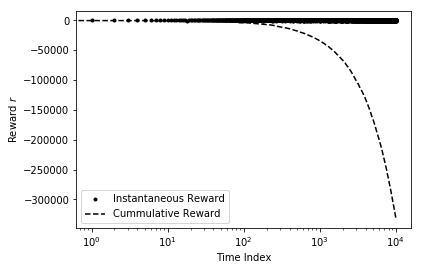

In [7]:
# plot instantaneous reward sequence
plt.figure()
plt.plot(rewards, "k.")
plt.plot(np.cumsum(rewards), "k--")
#plt.yscale('log')
plt.xscale('log')
plt.ylabel('Reward $r$')
plt.xlabel('Time Index')
plt.legend(['Instantaneous Reward', 'Cummulative Reward'])
plt.show()

In [ ]:
env.reset()